#### 159740 Assignment 2 Addition
## <center>Feature Extration for 26 English Letters</center>
<center>17238744 Rebecca Liu</center>
<center>18043158 Yonggang Li</center>
<center>18042783 Zoe Wang   </center>

### Introduction

This application is as an addition for a larger group for seminar and assignment 2 and technically based on the <a herf=https://link.springer.com/content/pdf/10.1023%2FA%3A1022606404104.pdf>paper</a> from PETER W. FREY and DAVID J. SLATE.  <br>
#### Usage
* Scale the image size to width x height = 100 x 180 pixels.
* Specify the file path in <font color='blue'>img_file_path</font> in code block 2 below.
* Run all the code block and you will get the feature vector at the end of this notebook.

#### 16 Features
1. The horizontal position, counting pixels from the left edge of the image, of the center of the smallest rectangular box that can be drawn with all "on" pixels inside the box. <br>
2. The vertical position, counting pixels from the bottom, of the above box. <br>
3. The width, in pixels, of the box. <br>
4. The height, in pixels, of the box. <br>
5. The total number of "on" pixels in the character image.<br>
6. The mean horizontal position of all "on" pixels relative to the center of the box and divided by the width of the box. This feature has a negative value if the image is "leftheavy" as would be the case for the letter L. <br> <font color='red' >Never see NEGATIVE values in train and test data set</font> 
7. The mean vertical position of all "on" pixels relative to the center of the box and divided by the height of the box. <br>
8. The mean squared value of the horizontal pixel distances as measured in 6 above. This attribute will have a higher value for images whose pixels are more widely separated in the horizontal direction as would be the case for the letters W or M.<br>
9. The mean squared value of the vertical pixel distances as measured in 7 above. <br>
10. The mean product of the horizontal and vertical distances for each "on" pixel as measured in 6 and 7 above. This attribute has a positive value for diagonal lines that run from bottom left to top right and a negative value for diagonal lines from top left to bottom right. <br><font color='red' >Never see NEGATIVE values in train and test data set</font> 
11. The mean value of the squared horizontal distance tunes the vertical distance for each "on" pixel. This measures the correlation of the horizontal variance with the vertical position. <br>
12. The mean value of the squared vertical distance times the horizontal distance for each "on" pixel. This measures the correlation of the vertical variance with the horizontal position. <br>
13. The mean number of edges (an "on" pixel immediately to the right of either an "off pixel or the image boundary) encountered when making systematic scans from left to right at all vertical positions within the box. This measure distinguishes between letters like "W" or "M" and letters like "I" or "L." <br>
14. The sum of the vertical positions of edges encountered as measured in 13 above. This feature will give a higher value if there are more edges at the top of the box, as in the letter "Y."<br>
15. The mean number of edges (an "on" pixel immediately above either an "off pixel or the image boundary) encountered when making systematic scans of the image from bottom to top over all horizontal positions within the box. <br>
16. The sum of horizontal positions of edges encountered as measured in 15 above.<br>

To run the application, opencv_python library must be installed properly, run <br> <b>!pip install opencv_python</b> <br>from Jupyter Notebook.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# initialized with 0
f_16 = [0 for x in range(16)]
binary_img = None
img_file_path = 'letter_imgs\\X-1.PNG'

In [3]:
# Load the specified image and return the original and binarized image
def load_and_binarize(img_path):
    img_o = cv2.imread(img_path)
    ret, img_b = cv2.threshold(img_o, 127, 255, cv2.THRESH_BINARY)
    img_h, img_w, img_c = img_b.shape
    bin_img = []
    for y in range(img_h):
        row = []
        for x in range(img_w):
            colors = img_b[y][x]
            if (colors[0] == 255):
                row.append(0)
            else:
                row.append(1)
        bin_img.append(row)
    return [img_o, img_b, bin_img]

In [4]:
# calculate the minimal boundary box, return the box [left, top, width, height]
def find_boundary_box(img):
    left = -1
    top = -1
    ritht = -1
    bottom = -1
    img_h = len(img)
    img_w = len(img[0])
    #scan from top and bottom to find the top and bottom
    find_top = 0
    find_bottom = False
    for y in range(img_h):
        for x in range(img_w):
            if find_top == False:
                if (img[y][x] == 1):
                    find_top = True
                    top = y
            if find_bottom == False:
                if (img[img_h-y-1][x] == 1):
                    find_bottom = True
                    bottom = img_h-y-1
            if find_bottom and find_top:
                break
        if find_bottom and find_top:
            break

    #scan from left and right to find the left and right
    find_left = False
    find_right = False
    for x in range(img_w):
        for y in range(img_h):
            if find_left == False:
                if (img[y][x] == 1):
                    find_left = True
                    left = x
            if find_right == False:
                if (img[y][img_w-x-1] == 1):
                    find_right = True
                    right = img_w-x-1
            if find_left and find_right:
                break
        if find_left and find_right:
            break

    return [left, top, right, bottom]

#### Load image and binarize, display

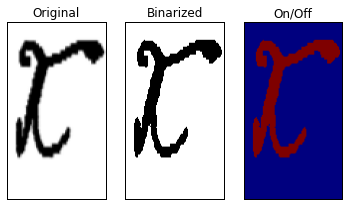

In [5]:
imgs = load_and_binarize(img_file_path)
titles = ['Original', 'Binarized', 'On/Off']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
binary_img = imgs[2]

#### Calulate the boundary box, its position and size

In [6]:
# [left, top, right, bottom]
g_box = find_boundary_box(binary_img)
img_h = len(binary_img)
img_w = len(binary_img[0])
# 1. box center to left
f_16[0] = (g_box[0]+g_box[2])/2
# 2. box center to bottom
f_16[1] = int(img_h - (g_box[1] + g_box[3])/2 - 1)
# 3. width
f_16[2] = g_box[2] - g_box[0] + 1
# 4. height
f_16[3] = g_box[3] - g_box[1] + 1
print(f_16[:4])

[52, 101, 88, 119]


#### Gather the pixels features

In [7]:
# 5. The total number of "on" pixels in the character image.
def total_on_pixels(img):
    on_pixels = 0
    for i in range(len(img)):
        on_pixels += np.sum(img[i])
    return on_pixels
f_16[4] = total_on_pixels(binary_img)

# horizontal and vertical distances of all 'on' pixels
def h_v_distances(img):
    origin_h = len(binary_img)
    h_dis = []
    v_dis = []
    h_center = f_16[0]
    v_center = f_16[1]
    for row in range(g_box[1], g_box[3]):
        for col in range(g_box[0], g_box[2]):
            if binary_img[row][col] == 1:
                h_dis.append(col - h_center)
                v_dis.append(origin_h - row - 1 - v_center)
    return h_dis, v_dis

total_on = float(f_16[4])
h_dis, v_dis = h_v_distances(binary_img)
# 6. The mean horizontal position of all "on" pixels relative to the center of the box and divided by the width of the box
f_16[5] = np.sum(h_dis)/total_on/f_16[2]
# 7. The mean vertical position of all "on" pixels relative to the center of the box and divided by the height of the box.
f_16[6] = np.sum(v_dis)/total_on/f_16[3]
# 8. The mean squared value of the horizontal pixel distances as measured in 6 above.
f_16[7] = np.sum(np.power(h_dis, 2))/total_on
# 9. The mean squared value of the vertical pixel distances as measured in 7 above
f_16[8] = np.sum(np.power(v_dis, 2))/total_on
# 10. The mean product of the horizontal and vertical distances for each "on" pixel as measured in 6 and 7 above
f_16[9] = np.dot(h_dis, v_dis)/total_on
# 11. The mean value of the squared horizontal distance times the vertical distance for each "on" pixel
f_16[10] = np.dot(np.power(h_dis, 2), v_dis)/total_on
# 12. The mean value of the squared vertical distance times the horizontal distance for each "on" pixel
f_16[11] = np.dot(np.power(v_dis, 2), h_dis)/total_on

print(f_16[4:12])

[2873, -0.1386102585197608, 0.072749183209657, 682.0285415941524, 1592.6662025757048, 306.3710407239819, 5183.758440654368, -9672.613296206056]


#### Gather the edge features

In [8]:
# perform two scans: from left to right, from bottom to top. Returns two array for the edge positions of each scan 
def find_edges(img):
    img_h = len(img)
    box_w = f_16[2]
    box_h = f_16[3]
    box_left = g_box[0]
    box_right = g_box[2]
    box_top = g_box[1]
    
    h_edges = 0
    v_pos = 0
    h_edges_pos = [-1 for x in range(box_h)]
    for i in range(box_w):
        x = box_left + i
        for j in range(box_h):
            y = box_top + j
            if binary_img[y][x] == 1:
                if h_edges_pos[i] == -1:
                    h_edges_pos[i] = img_h - y - 1
            else:
                if h_edges_pos[j] > -1:
                    v_pos += h_edges_pos[j]
                    h_edges_pos[j] = -1
                    h_edges += 1
    v_edges = 0
    h_pos = 0
    v_edges_pos = [-1 for x in range(box_w)]
    for i in range(box_h):
        y = box_top + i
        for j in range(box_w):
            x = box_left + j
            if binary_img[y][x] == 1:
                if v_edges_pos[j] == -1:
                    v_edges_pos[j] = x
            else:
                if v_edges_pos[j] > -1:
                    h_pos += v_edges_pos[j]
                    v_edges_pos[j] = -1
                    v_edges += 1
    return float(h_edges)/box_h, v_pos, float(v_edges)/box_w, h_pos

h_mean, v_pos, v_mean, h_pos = find_edges(binary_img)
# 13. The mean number of edges (an "on" pixel immediately to the right of either an "off" pixel or the image boundary) 
#     encountered when making systematic scans from left to right at all vertical positions within the box.
f_16[12] = h_mean
# 14. The sum of the vertical positions of edges encountered as measured in 13 above. This feature will give a higher value if
#     there are more edges at the top of the box, as in the letter "Y.“
f_16[13] = v_pos
# 15. The mean number of edges (an "on" pixel immediately above either an "off" pixel or the image boundary) encountered when 
#     making systematic scans of the image from bottom to top over all horizontal positions within the box.
f_16[14] = v_mean
# 16. The sum of horizontal positions of edges encountered as measured in 15 above.
f_16[15] = h_pos

#### Scale the feature vector
Algorithm is <b>V_scaled = V*15/max(V)</b> <br>
Let's define the maximum value for each feature, since I don't have all images to find the maximum value for each feature. The values are estiamted based on the image size which has been scaled to 100x180.

In [9]:
FEATURE_MAX = [70, 150, 100, 180, 100*180*0.4, 0.2, 0.1, 50*50, 90*90, 50*90*0.15, 50*50*10, 5*90*90, 4, 100*180, 4, 100*120]

In [10]:
f_16_scaled = [0 for x in range(16)]
print('Before scale: ')
print (f_16)
for i in range(len(f_16)):
    f_16_scaled[i] = int(float(f_16[i])/FEATURE_MAX[i]*15)
print('\nAfter scale: ')
print(f_16_scaled)

Before scale: 
[52, 101, 88, 119, 2873, -0.1386102585197608, 0.072749183209657, 682.0285415941524, 1592.6662025757048, 306.3710407239819, 5183.758440654368, -9672.613296206056, 1.0084033613445378, 15871, 1.5113636363636365, 6202]

After scale: 
[11, 10, 13, 9, 5, -10, 10, 4, 2, 6, 3, -3, 3, 13, 5, 7]


### Reference
[1] https://link.springer.com/content/pdf/10.1023%2FA%3A1022606404104.pdf <br>
[2] https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html